# Examining Racial Discrimination in the US Job Market

### Background
Racial discrimination continues to be pervasive in cultures throughout the world. Researchers examined the level of racial discrimination in the United States labor market by randomly assigning identical résumés to black-sounding or white-sounding names and observing the impact on requests for interviews from employers.

### Data
In the dataset provided, each row represents a resume. The 'race' column has two values, 'b' and 'w', indicating black-sounding and white-sounding. The column 'call' has two values, 1 and 0, indicating whether the resume received a call from employers or not.

Note that the 'b' and 'w' values in race are assigned randomly to the resumes when presented to the employer.

### Exercises
You will perform a statistical analysis to establish whether race has a significant impact on the rate of callbacks for resumes.

Answer the following questions **in this notebook below and submit to your Github account**. 

   1. What test is appropriate for this problem? Does CLT apply?
   2. What are the null and alternate hypotheses?
   3. Compute margin of error, confidence interval, and p-value. Try using both the bootstrapping and the frequentist statistical approaches.
   4. Write a story describing the statistical significance in the context or the original problem.
   5. Does your analysis mean that race/name is the most important factor in callback success? Why or why not? If not, how would you amend your analysis?

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources
+ Experiment information and data source: http://www.povertyactionlab.org/evaluation/discrimination-job-market-united-states
+ Scipy statistical methods: http://docs.scipy.org/doc/scipy/reference/stats.html 
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
+ Formulas for the Bernoulli distribution: https://en.wikipedia.org/wiki/Bernoulli_distribution

In [1]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

In [2]:
data = pd.io.stata.read_stata('C:/Users/RAPP/Documents/SPringboard Intermediate Python/EDA_racial_discrimination/data/us_job_market_discrimination.dta')

In [3]:
# number of callbacks for black-sounding names
sum(data[data.race=='w'].call)

235.0

In [4]:
data.head()

,id,ad,education,ofjobs,yearsexp,honors,volunteer,military,empholes,occupspecific,...,compreq,orgreq,manuf,transcom,bankreal,trade,busservice,othservice,missind,ownership
0,b,1,4,2,6,0,0,0,1,17,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,
1,b,1,3,3,6,0,1,1,0,316,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,
2,b,1,4,1,6,0,0,0,0,19,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,
3,b,1,3,4,6,0,1,0,1,313,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,
4,b,1,3,3,22,0,0,0,0,313,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,Nonprofit


In [5]:

w = data[data.race=='w']
b = data[data.race=='b']


***
***

# Q1. What test is appropriate for this problem? Does CLT apply?

The CLT does apply as the sample size is large (>30).  The most appropriate test would be a hyptothesis permutation test (A/B test) or a two proportion freqentist test

***

# Q2. What are the null and alternate hypotheses?

The null and alternative hypotheses that will be tested:  
H0:  There is no difference in the fraction of black callbacks as compared to the fraction of white callbacks  
H1:  There is a difference in the fraction of black callbacks as compared to the fraction of white callbacks  

***

# Q3: Compute margin of error, confidence interval, and p-value. Try using both the bootstrapping and the frequentist statistical approaches.

### Try bootstrapping method with permutation test




**Define applicable functions**

In [6]:
def diff_from_mean(data, diff= 98.6):
    return np.mean(data) -diff

def diff_frac(data_A, data_B):
    frac_A = np.sum(data_A)/len(data_A)
    frac_B = np.sum(data_B)/len(data_B)
    return frac_B - frac_A

def permutation_sample(data1, data2):
    """Generate a permutation sample from two data sets."""

    # Concatenate the data sets: data
    data = np.concatenate((data1, data2))

    # Permute the concatenated array: permuted_data
    permuted_data = np.random.permutation(data)

    # Split the permuted array into two: perm_sample_1, perm_sample_2
    perm_sample_1 = permuted_data[:len(data1)]
    perm_sample_2 = permuted_data[len(data1):]

    return perm_sample_1, perm_sample_2


def draw_perm_reps(data_1, data_2, func, size=1):

    # Initialize array of replicates: perm_replicates
    perm_replicates = np.empty(size)

    for i in range(size):
        # Generate permutation sample
        perm_sample_1, perm_sample_2 = permutation_sample(data_1, data_2)

        # Compute the test statistic23
        perm_replicates[i] = func(perm_sample_1, perm_sample_2)

    return perm_replicates

**Generate 100000 replicates.  Each replicate gives a potential difference in fraction of black callbacks compared to white callbacks.  The mean of the distribution of replicates should be near zero.**

157.0 235.0


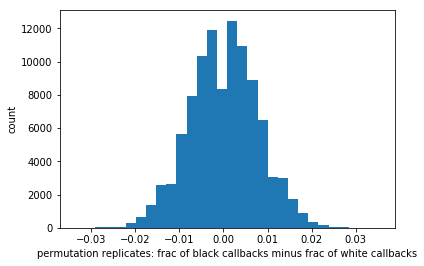

In [7]:
b_callbacks = sum(data[data.race=='b'].call)
w_callbacks = sum(data[data.race=='w'].call)
print(b_callbacks, w_callbacks)                  
                  
perm_replicates = np.empty(100000)


for i in range(100000):
    perm_replicates[i] = draw_perm_reps(data[data.race=='w'].call, data[data.race=='b'].call, diff_frac)
    
plt.hist(perm_replicates, bins = 30)
_ = plt.xlabel('permutation replicates: frac of black callbacks minus frac of white callbacks')
_ = plt.ylabel('count') 

**Perform permutation test**

In [8]:

    
diff_frac_obs = diff_frac(data[data.race=='w'].call, data[data.race=='b'].call)
print("The fraction of white callbacks in the sample dataset is: "+ str(np.sum(data[data.race=='w'].call)/len(data[data.race=='w'].call)))
print("The fraction of black callbacks the sample  dataset is: "+ str(np.sum(data[data.race=='b'].call)/len(data[data.race=='b'].call)))
print("In the sample dataset, the difference between the fraction of black callbacks and the fraction of white callbacks is: "+ str(diff_frac_obs))


p_value = np.sum(perm_replicates < diff_frac_obs)/100000


print("Assuming the distribution of replicates represents the population, the probability of getting this difference is " + str(p_value))
print("")

The fraction of white callbacks in the sample dataset is: 0.09650924024640657
The fraction of black callbacks the sample  dataset is: 0.06447638603696099
In the sample dataset, the difference between the fraction of black callbacks and the fraction of white callbacks is: -0.032032854209445585
Assuming the distribution of replicates represents the population, the probability of getting this difference is 1e-05



The p value is 0.00005, which is less then 0.025 (half of 5% as required for a two tailed test).  Thus we can reject the null hypothesis.

**Compute margin of error, confidence interval**

For a distribution, the margin of error can be calculated by the following equation:
$$ MOE  = {\sigma}{z} $$  
The confidence interval is:

$$ \mu \pm z*MOE $$ 

In [9]:
conf_int = np.percentile(perm_replicates, [2.5, 97.5])
mu = np.mean(perm_replicates)
sigma = np.std(perm_replicates)
std_err = sigma/np.sqrt(100000)
moe = 1.9599*sigma


#print("The confidence interval is: " + str(conf_int))
print("Assuming the distribution of replicates is a good represention of the population,at the 95% confidence interval, the difference between the fraction of blacks callbacks and fraction of white callbacks should be between "  + str(moe+mu) + " and "+str(mu-moe))
print("The margin of error is: " + str(moe))

print("Using np.percentile, 95% of the replicate values lie between "  + str(conf_int[0]) + " and "+str(conf_int[1]))

Assuming the distribution of replicates is a good represention of the population,at the 95% confidence interval, the difference between the fraction of blacks callbacks and fraction of white callbacks should be between 0.015264304896425553 and -0.015241898325583663
The margin of error is: 0.015253101611004608
Using np.percentile, 95% of the replicate values lie between -0.015605749486652984 and 0.015605749486652984


As mentioned, the difference between the fraction of black callbacks and the fraction of white callbacks in the sample is -0.032.  This falls outside the confidence interval calculated for the distribution of replicates, indicating the null hypothesis should be rejected.

***

## Frequentist test using a hypothesis test for the difference between two proportions

The test procedure, called the two-proportion z-test, is appropriate when the following conditions are met:

* The sampling method for each population is simple random sampling.
* The samples are independent.
* Each sample includes at least 10 successes and 10 failures.
* Each population is at least 20 times as big as its sample.

In this case, all these conditions are met.  
  
An outline of the method is found here: https://stattrek.com/hypothesis-test/difference-in-proportions.aspx

The hypothesis test is again :  
H0:  There is no difference in the fraction of black callbacks as compared to the fraction of white callbacks  
H1:  There is a difference in the fraction of black callbacks as compared to the fraction of white callbacks

**Calculate pooled sample proportion**  

The pooled sample proportion (psp) is: 
$$psp = \frac{p1 * n1 + p2 * n2 }{n1 + n2} $$  

  
where p1 is the sample proportion from population 1, p2 is the sample proportion from population 2, n1 is the size of sample 1, and n2 is the size of sample 2.  In our case p1 is the fraction of white callbacks, and p2 is the fraction of black callbacks.

In [10]:
p1 = np.sum(data[data.race=='w'].call)/len(data[data.race=='w'])
p2 = np.sum(data[data.race=='b'].call)/len(data[data.race=='b'])
n1 = len(data[data.race=='w'])
n2 = len(data[data.race=='b'])
         
psp = (p1 * n1 + p2 * n2) / (n1 + n2)
print("psp = "+ str(psp))



psp = 0.08049281314168377


Note that this is actually the same as the sum of all the callbacks divided by number of potential callbacks

**Now calculate standard error**


$$SE = \sqrt{ psp * ( 1 - psp ) * [\frac{1}{n1} + \frac{1}{n2} ] }$$

In [11]:
SE = np.sqrt(psp*(1-psp)*(1/n1+1/n2))
print("The Standard Error is: " + str(SE))

The Standard Error is: 0.007796894036170457


In [12]:
x1 = p1*(1-p1)/n1
x2 = p2*(1-p2)/n2


**Calculate z score:**
$$z = \frac{p1 - p2}{SE}$$

In [13]:
z = (p1-p2)/SE
print("z = " + str(z))

z = 4.108412152434346


In [14]:
import scipy.stats as st
print(st.norm.ppf(.975))
print("The test statistic for a two tailed test at the 5% level is: " + str(st.norm.ppf(.95)))

print("Therefore the p value is " + str(1-st.norm.cdf(z)))


1.959963984540054
The test statistic for a two tailed test at the 5% level is: 1.6448536269514722
Therefore the p value is 1.991943418788722e-05


The p value is extremely small, so we **reject the null hypothesis**

**Compute margin of error, confidence interval**

For two proportions, the margin of error can be calculated by the following equation:
$$ MOE  = \sqrt{\frac{p1(1-p1)}{n1}-\frac{p2(1-p2)}{n2}} $$  
The confidence interval is:

$$ (p1-p2) \pm z*MOE $$ 

In [15]:

moe = np.sqrt(p1*(1-p1)/n1 - p2*(1-p2)/n2)
z = 1.96  # z at 95% confidence level

print("The difference between the fraction of black callbacks and fraction of white callbacks in our sample is: " + str(p1-p2))
print("The margin of error in the sample p1-p2 is: " + str(moe) )
print("We can be 95% confident that p1-p2 of the sample falls between "+ str((p1-p2)-z*moe) + " and " + str((p1-p2)+z*moe))

The difference between the fraction of black callbacks and fraction of white callbacks in our sample is: 0.032032854209445585
The margin of error in the sample p1-p2 is: 0.003322255555574844
We can be 95% confident that p1-p2 of the sample falls between 0.02552123332051889 and 0.03854447509837228


***

# Q4. Write a story describing the statistical significance in the context or the original problem  

Using a A/B test and a two-proportion frequentist test, we have shown that the difference between the fraction of black callbacks and fraction of white callbacks likely lies between 0.0255 and 0.0385 in our sample. If the callback selections did not depend on whether the names were "black sounding" or "white sounding", one would expect that difference to be much closer to zero (between 0.015 and -0.015).  The probability that the callbacks in the sample were unbiased is less then 0.5%, indicating that there is a high likelihood that "white sounding" names are indeed more likely to receive a callback (assuming other resume qualifications are equal).  

It should be noted that the allocation of "black sounding" vs "white sounding" names seems like a potentially subjective measure.  A question that should be considered is whether all the job hunters would categorize the names as "white sounding" vs "black sounding" in an identical way the person setting up the experiment would. While this discrepancy could affect the experiment some, it is unlikely to tip the scales since the probabilities found in our analysis indicate a very strong likelihood of racial bias based on name.

***

# Q5. Does your analysis mean that race/name is the most important factor in callback success? Why or why not? If not, how would you amend your analysis?  

This does not mean that race/name is the most important factor in callback success. It only means that race/name could indeed be a factor.  To determine comparative importance to other factors, similar analyses would need to be performed on the other factors (credentials, wealth, neighborhood, etc) in the dataset to determine those p values.  If those p values do not indicate as strong of significance as the race/name tests, then we can then say race/name is the most important factor.   It appears other factors were evaluated as the data documentation states that:  

*Some qualities that we might think would level the playing field had minimal effects. For example, there is evidence that the returns to improving credentials for whites are much higher than for blacks. For resumes with white names, higher quality resumes received 30 percent more callbacks than low quality ones. For resumes with black names, the higher quality resumes did not receive significantly more callbacks. Whites living in richer, more educated, or whiter neighborhoods also have higher callback rates, but blacks do not benefit any more than whites from this neighborhood effect.*